In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.drop(columns=['Serial No.'],inplace=True)

In [7]:
data.shape

(500, 8)

In [8]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 7), (400,), (100, 7), (100,))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_x_scale = scale.fit_transform(train_x) #scaled np array
test_x_scale = scale.fit_transform(test_x)   #scaled np array

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear')) #as this is Regression problem

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0663 - val_loss: 0.0529
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486 - val_loss: 0.0401
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0417 - val_loss: 0.0323
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342 - val_loss: 0.0267
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 - val_loss: 0.0225
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 - val_loss: 0.0200
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 - val_loss: 0.0187
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208 - val_loss: 0.0180
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - val_loss: 0.0176
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0173


In [16]:
#prediction
y_pred = model.predict(test_x_scale)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [17]:
from sklearn.metrics import r2_score

r2_score(test_y,y_pred)

-0.2637305013611362

Performance is not that good

Lets upgrade it's architecture

In [18]:
 model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1975 - val_loss: 0.1604
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1532 - val_loss: 0.1231
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1207 - val_loss: 0.1028
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0923 - val_loss: 0.0915
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0891 - val_loss: 0.0800
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810 - val_loss: 0.0685
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0647 - val_loss: 0.0581
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0520 - val_loss: 0.0483
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517 - val_loss: 0.0391
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 - val_loss: 0.0313
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304 - val_loss: 0.0252
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0048
Epoch 72/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - val_loss: 0.0046
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - val_loss: 0.0046
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 79/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 80/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 

In [21]:
#prediction
y_pred = model.predict(test_x_scale)

r2_score(test_y,y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.706150143541878

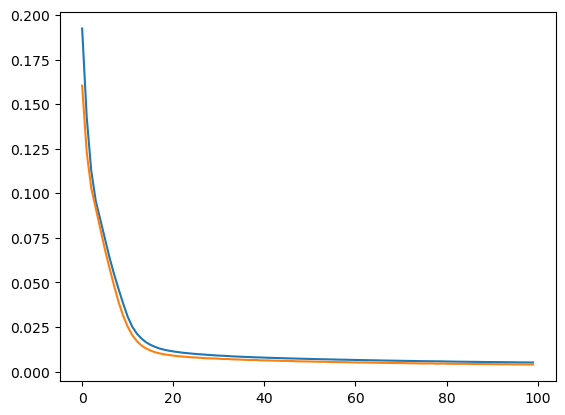

In [22]:
#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()